Importing the neccessary dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data Collection and Preprocessing

In [2]:
car_data = pd.read_csv('/content/Car Price.csv')

In [3]:
# displaying first five rows of the dataset
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# displaying the no. of rows and columns in a dataset
car_data.shape

(205, 26)

In [5]:
# Checking null value in a dataset
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
# displaying the stastical measure of the dataset
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# getting the info of a dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
#Displaying the distribution of columns in a dataset
print(car_data.fueltype.value_counts())
print(car_data.carbody.value_counts())
print(car_data.wheelbase.value_counts())
print(car_data.carwidth.value_counts())
print(car_data.carlength.value_counts())
print(car_data.curbweight.value_counts())
print(car_data.enginetype.value_counts())
print(car_data.cylindernumber.value_counts())
print(car_data.fuelsystem.value_counts())
print(car_data.enginesize.value_counts())
print(car_data.stroke.value_counts())
print(car_data.compressionratio.value_counts())
print(car_data.horsepower.value_counts())
print(car_data.citympg.value_counts())
print(car_data.price.value_counts())
print(car_data.peakrpm.value_counts())
print(car_data.highwaympg.value_counts())


gas       185
diesel     20
Name: fueltype, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
93.3      1
99.4      1
99.5      1
88.4      1
94.3      1
96.0      1
95.1      1
93.0      1
102.0     1
106.7     1
108.0     1
96.6      1
99.2      1
112.0     1
102.7     1
120.9     1
Name: wheelbase, dtype: int64
63.8    24
66.5    23
65.4    15
63.6    11
64.4    10
68.4    10
64.0     9
65.5     8
65.2     7
64.2     6
66.3     6
65.6     6
67.2     6
67.9     5
66.9 

In [17]:
# Encoding the categorical data into numerical data
car_data.replace({'fueltype':{'gas':0, 'diesel':1}, 'carbody':{'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4}, 'enginetype':{'ohc':0,'ohcf':1,'ohcv':2,'dohc':3,'l':4,'rotor':5,'dohcv':6,}, 'cylindernumber':{'four':0,'six':1,'five':2,'eight':3,'two':4,'three':5,'twelve':6}, 'fuelsystem':{'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl':5,'mfi':6,'spfi':7}}, inplace=True)

In [18]:
#displaying the column after encoding
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,std,two,4,rwd,front,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,std,two,4,rwd,front,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,std,two,1,rwd,front,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,std,four,0,fwd,front,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,std,four,0,4wd,front,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Visualization

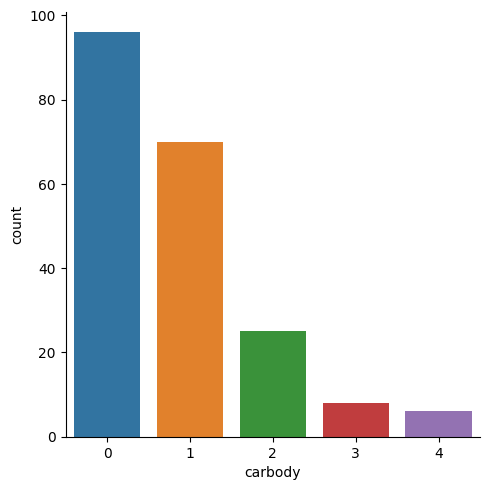

In [19]:
# Checking car body in each column
sns.catplot(x='carbody', data=car_data, kind='count')

<Axes: xlabel='price', ylabel='fuelsystem'>

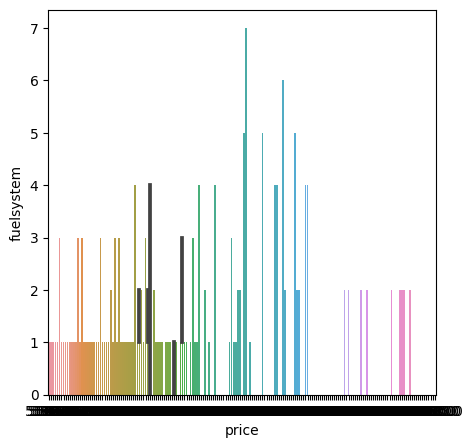

In [20]:
# Fuel system vs prices
plot = plt.figure(figsize=(5,5))
sns.barplot(x='price', data=car_data, y='fuelsystem')

# Splitting features and target data


In [21]:
X=car_data.drop(columns=['car_ID', 'symboling', 'CarName', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation', 'carheight', 'boreratio','price'])
Y=car_data['price']

In [22]:
print(X,Y)

     fueltype  carbody  wheelbase  carlength  carwidth  curbweight  \
0           0        4       88.6      168.8      64.1        2548   
1           0        4       88.6      168.8      64.1        2548   
2           0        1       94.5      171.2      65.5        2823   
3           0        0       99.8      176.6      66.2        2337   
4           0        0       99.4      176.6      66.4        2824   
..        ...      ...        ...        ...       ...         ...   
200         0        0      109.1      188.8      68.9        2952   
201         0        0      109.1      188.8      68.8        3049   
202         0        0      109.1      188.8      68.9        3012   
203         1        0      109.1      188.8      68.9        3217   
204         0        0      109.1      188.8      68.9        3062   

     enginetype  cylindernumber  enginesize  fuelsystem  stroke  \
0             3               0         130           0    2.68   
1             3          

# Splitting the data into train test split

In [23]:
X_train, X_test, Y_train,Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

In [24]:
print(X.shape, X_train.shape,X_test.shape)

(205, 16) (164, 16) (41, 16)


#Training the model

Here, we are using Linear regression model at first

In [25]:
lin_model = LinearRegression()

In [26]:
#training our data with the model
lin_model.fit(X_train, Y_train)

LinearRegression()

In [27]:
# Accuracy on the training data
X_train_prediction = lin_model.predict(X_train)

In [28]:
# R squared error
error_score = metrics.r2_score(Y_train,X_train_prediction )
print("Root Squared error on training data: ", error_score)

Root Squared error on training data:  0.8860227806630645


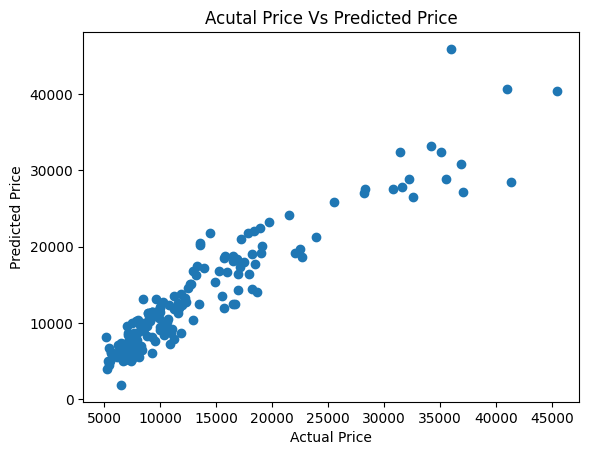

In [29]:
# Visualizing the actual price and predicted price
plt.scatter(Y_train, X_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Acutal Price Vs Predicted Price")
plt.show()


In [31]:
# Training our test data using the model
X_test_prediction = lin_model.predict(X_test)

In [32]:
# Accuracy on testing data ( R square error)
error_score = metrics.r2_score(Y_test, X_test_prediction)
print("Root Squared Error on testing data: ", error_score)

Root Squared Error on testing data:  0.6929045145487617


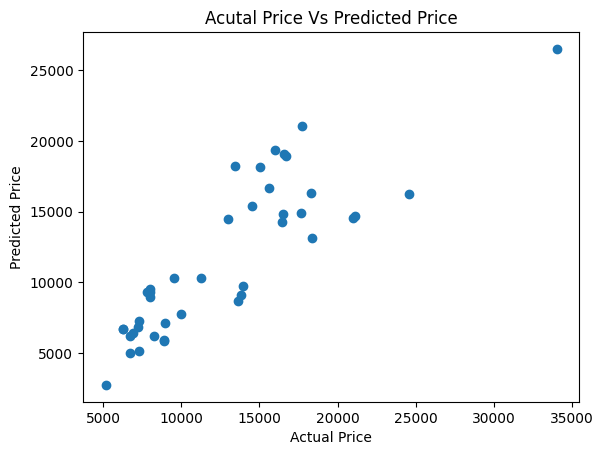

In [33]:
# Visualizing the actual price and predicted price
plt.scatter(Y_test, X_test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Acutal Price Vs Predicted Price")
plt.show()


# Lasso Model

In [34]:
lass_model = Lasso()

In [35]:
#training our data with the model
lass_model.fit(X_train, Y_train)

Lasso()

In [36]:
# Accuracy on the training data
X_train_prediction = lass_model.predict(X_train)

In [37]:
# R squared error
error_score = metrics.r2_score(Y_train,X_train_prediction )
print("Root Squared error on training data: ", error_score)

Root Squared error on training data:  0.8860081305468286


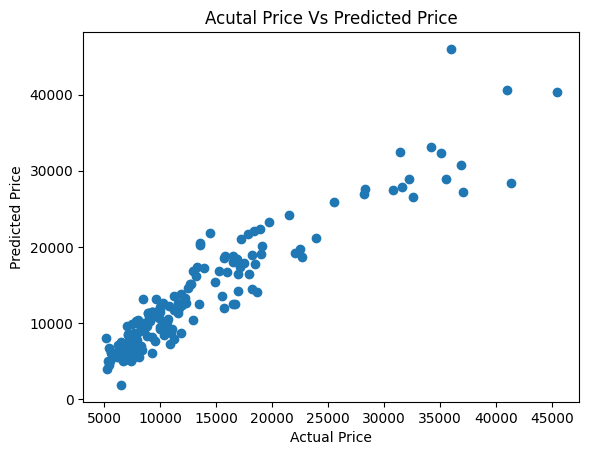

In [38]:
# Visualizing the actual price and predicted price
plt.scatter(Y_train, X_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Acutal Price Vs Predicted Price")
plt.show()


In [39]:
# Training our test data using the model
X_test_prediction = lass_model.predict(X_test)

In [40]:
# Accuracy on testing data ( R square error)
error_score = metrics.r2_score(Y_test, X_test_prediction)
print("Root Squared Error on testing data: ", error_score)

Root Squared Error on testing data:  0.6948138440030078


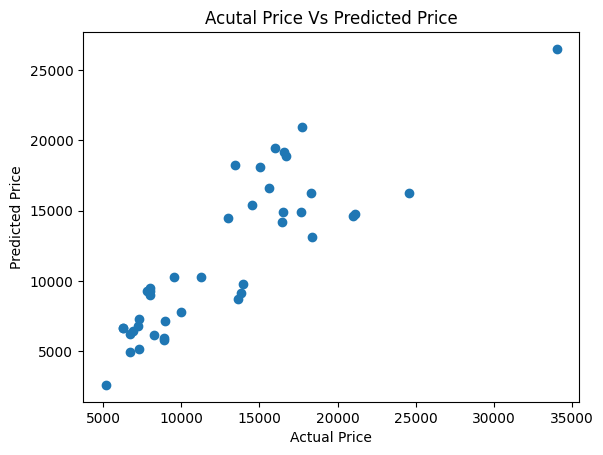

In [41]:
# Visualizing the actual price and predicted price
plt.scatter(Y_test, X_test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Acutal Price Vs Predicted Price")
plt.show()
